# Pytorch: Custom NN Modules
https://pytorch.org/tutorials/beginner/examples_nn/polynomial_module.html  

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



PyTorch: Custom nn Modules
--------------------------

A third order polynomial, trained to predict $y=\sin(x)$ from $-\pi$
to $pi$ by minimizing squared Euclidean distance.

This implementation defines the model as a custom Module subclass. Whenever you
want a model more complex than a simple sequence of existing Modules you will
need to define your model this way.



In [2]:
import math
import torch

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

### Custom NN Modules

In [ ]:
# 要建立一些 require_grad = True 的 parameters，並使用這些 parameters 來建立 foward 的 function

class Polynomial3(torch.nn.Module):

    def __init__(self):
        """
        In the constructor we instantiate four parameters and assign them as
        member parameters.
        """
        super().__init__()
        self.a = torch.nn.Parameter(torch.randn(()))
        self.b = torch.nn.Parameter(torch.randn(()))
        self.c = torch.nn.Parameter(torch.randn(()))
        self.d = torch.nn.Parameter(torch.randn(()))


    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        return self.a + self.b * x + self.c * x ** 2 + self.d * x ** 3


    def string(self):
        """
        Just like any class in Python, you can also define custom method on PyTorch modules
        """
        return f'y = {self.a.item()} + {self.b.item()} * x + {self.c.item()} * x**2 + {self.d.item()} * x**3'

In [4]:
# Construct our model by instantiating the class defined above
model = Polynomial3()
model._parameters

OrderedDict([('a',
              Parameter containing:
              tensor(-0.3363, requires_grad=True)),
             ('b',
              Parameter containing:
              tensor(0.1475, requires_grad=True)),
             ('c',
              Parameter containing:
              tensor(3.1196, requires_grad=True)),
             ('d',
              Parameter containing:
              tensor(0.6859, requires_grad=True))])

In [5]:
# Construct our loss function and an Optimizer. 
# The call to model.parameters() in the SGD constructor will contain
# the learnable parameters of the nn.Linear module which is members of the model.
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-6)

In [6]:
for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)

    if t % 100 == 99:
        print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()    
    loss.backward()
    optimizer.step()

f'Result: {model.string()}'

99 916.4989624023438
199 630.14599609375
299 434.6304931640625
399 300.9725341796875
499 209.49624633789062
599 146.8174591064453
699 103.82135772705078
799 74.29342651367188
899 53.992000579833984
999 40.018428802490234
1099 30.389726638793945
1199 23.747760772705078
1299 19.161090850830078
1399 15.99047565460205
1499 13.796431541442871
1599 12.276651382446289
1699 11.222908020019531
1799 10.491569519042969
1899 9.983529090881348
1999 9.63028335571289


'Result: y = -0.026745673269033432 + 0.8438939452171326 * x + 0.004614072386175394 * x**2 + -0.09150303155183792 * x**3'

In [7]:
print(f'Result: y = {model.a.item()} + {model.b.item()} * x + {model.c.item()} * x**2 + {model.d.item()} * x**3')

Result: y = -0.026745673269033432 + 0.8438939452171326 * x + 0.004614072386175394 * x**2 + -0.09150303155183792 * x**3


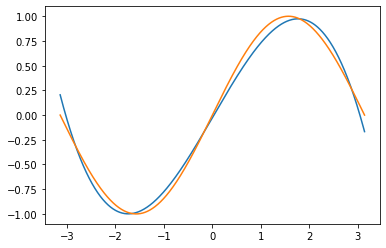

In [8]:
y1 = model.a.item() + model.b.item() * x + model.c.item() * x**2 + model.d.item() * x**3

plt.plot(x, y1); 
plt.plot(x, np.sin(x)); 